# Dimensionality Reduction

## t-SNE on Female ANSUR Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = ("https://raw.githubusercontent.com/senihberkay/US-Army-ANSUR-II/master/ANSUR%20II%20FEMALE%20Public.csv")
df = pd.read_csv(url)

df.shape

(1986, 108)

In [ ]:
df.columns[:10]

Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed'],
      dtype='object')

In [ ]:
df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [ ]:
# Select only numeric columns for t-SNE
features_df = df.select_dtypes(include=['float64', 'int64'])

In [ ]:
# Handle missing values
features_df = features_df.dropna()

In [ ]:
# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

In [ ]:
features_df.shape

(1986, 99)

In [ ]:
features_df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
0,10037,231,1282,301,204,1180,222,177,373,315,...,345,942,657,152,756,2,2,26,61,142
1,10038,194,1379,320,207,1292,225,178,372,272,...,329,1032,534,155,815,3,3,21,64,120
2,10042,183,1369,329,233,1271,237,196,397,300,...,367,1035,663,162,799,1,1,23,68,147
3,10043,261,1356,306,214,1250,240,188,384,364,...,371,999,782,173,818,8,2,22,66,175
4,10051,309,1303,308,214,1210,217,182,378,320,...,380,911,886,152,762,1,1,45,63,195


In [ ]:
# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
# Visualize
tsne_df = pd.DataFrame(tsne_result, columns=['TSNE1', 'TSNE2'])

In [ ]:
tsne_df.shape

(1986, 2)

In [ ]:
tsne_df.head()

,TSNE1,TSNE2
0,-15.855219,-4.751852
1,6.770523,30.478949
2,35.273384,10.356212
3,26.802792,-14.024784
4,10.142718,-32.132980


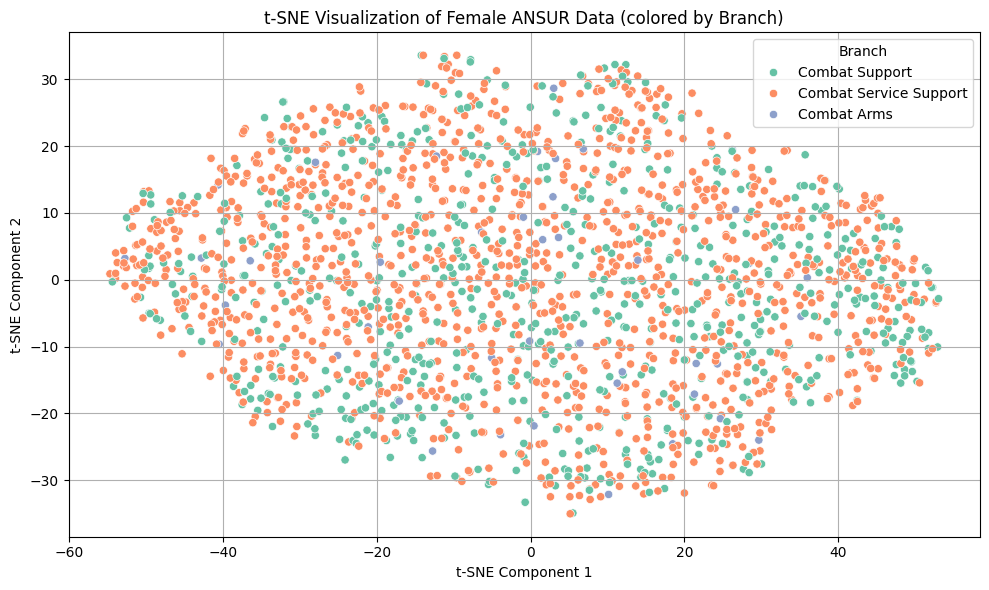

In [ ]:
# Optional: color by a category, if available (like 'Branch' or 'Age')

if 'Branch' in df.columns:
    tsne_df['Branch'] = df.loc[features_df.index, 'Branch']
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Branch', palette='Set2')
    plt.title('t-SNE Visualization of Female ANSUR Data (colored by Branch)')
else:
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.6)
    plt.title('t-SNE Visualization of Female ANSUR Data')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


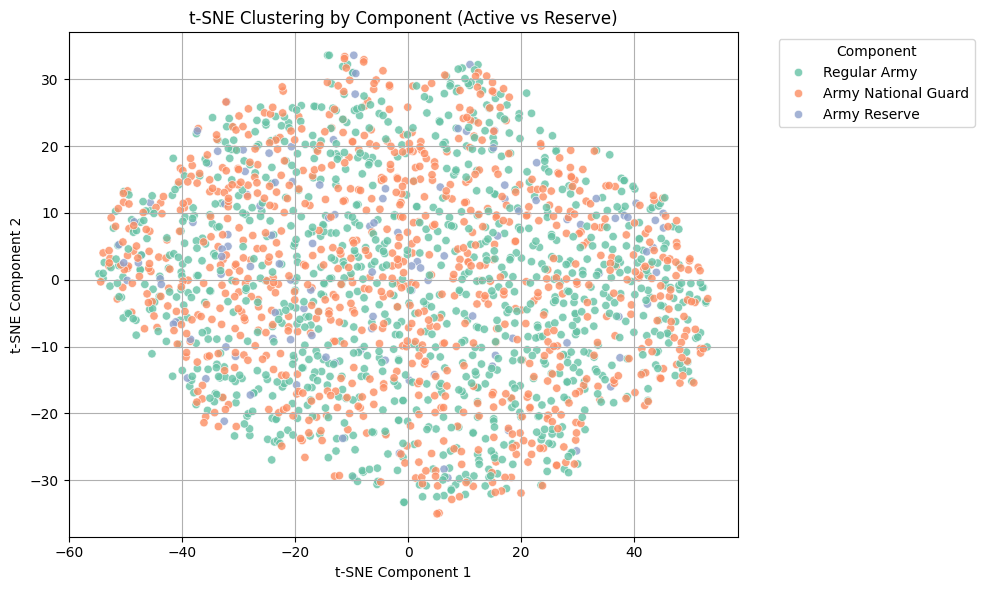

In [ ]:
tsne_df['Component'] = df.loc[features_df.index, 'Component']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Component', palette='Set2', alpha=0.8)
plt.title('t-SNE Clustering by Component (Active vs Reserve)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Component', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Apply VarianceThreshold on numeric data
sel = VarianceThreshold(threshold=1.0)
sel.fit(features_df)

# Get boolean mask of features that remain
mask = sel.get_support()
print(mask)


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True]


In [ ]:
# Get names of selected features
selected_features = features_df.columns[mask]
print("Selected features with variance > 1:")
print(selected_features)

Selected features with variance > 1:
Index(['SubjectId', 'abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlen

In [ ]:
reduced_df = features_df.loc[:, mask]

In [ ]:
reduced_df.shape

(1986, 98)

In [ ]:
# Select only desired columns
weights_df = df[['Weightlbs', 'weightkg', 'Heightin']].dropna()

In [ ]:
weights_df.head()

,Weightlbs,weightkg,Heightin
0,142,657,61
1,120,534,64
2,147,663,68
3,175,782,66
4,195,886,63


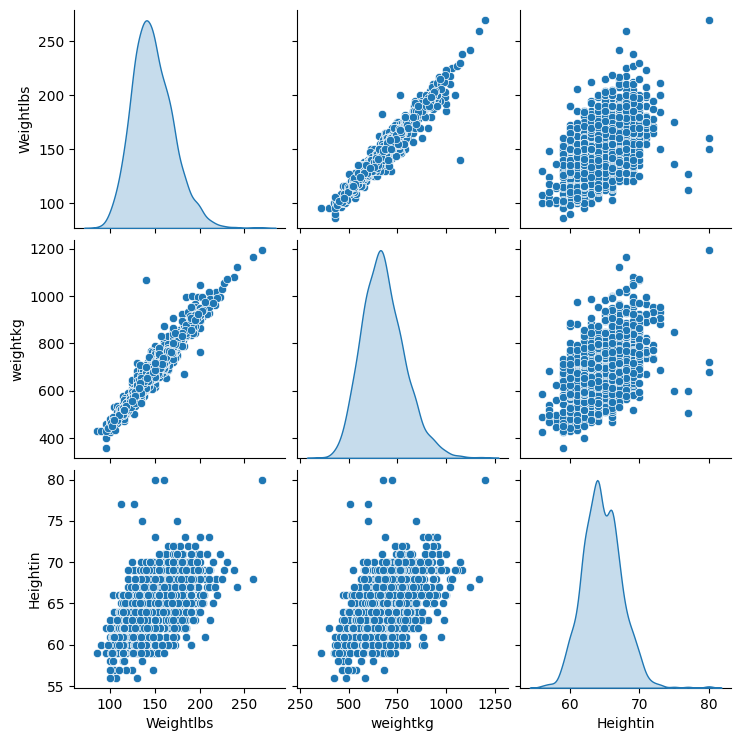

In [ ]:
# Create a pairplot
sns.pairplot(weights_df, diag_kind='kde')
plt.show()

In [ ]:
weights_df.corr()

,Weightlbs,weightkg,Heightin
Weightlbs,1.000000,0.970784,0.502403
weightkg,0.970784,1.000000,0.502772
Heightin,0.502403,0.502772,1.000000


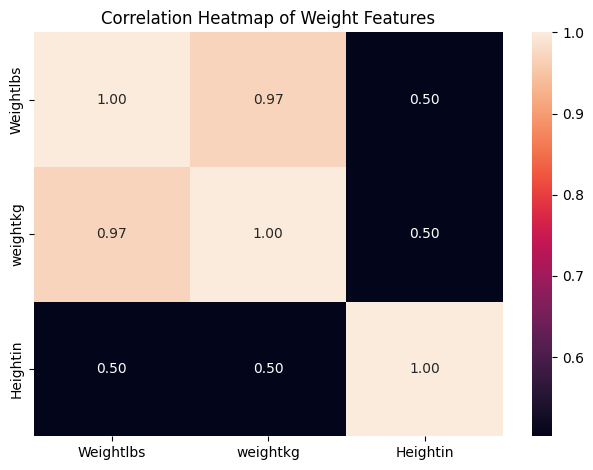

In [ ]:
# Plot the correlation heatmap
sns.heatmap(weights_df.corr(), annot=True, fmt=".2f")

plt.title("Correlation Heatmap of Weight Features")
plt.tight_layout()
plt.show()

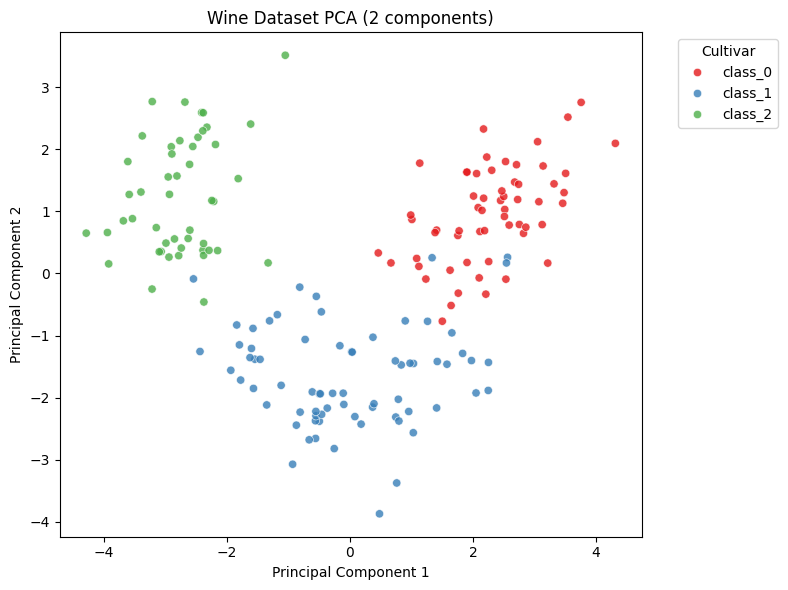

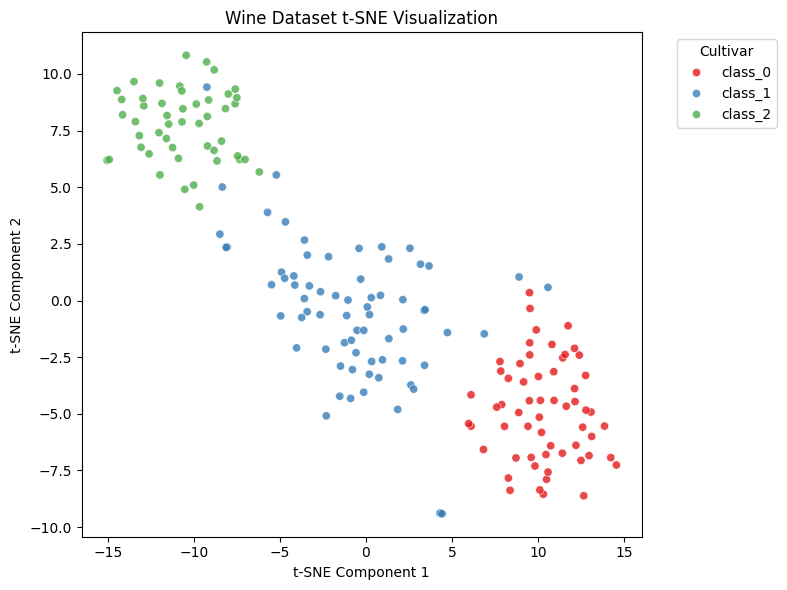

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [ ]:

# Load the Wine dataset
data = load_wine(as_frame=True)
X = data.data
y = data.target
labels = data.target_names[y]


In [ ]:

# Standardize
X_scaled = StandardScaler().fit_transform(X)


In [ ]:

# --- PCA ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cultivar': labels
})


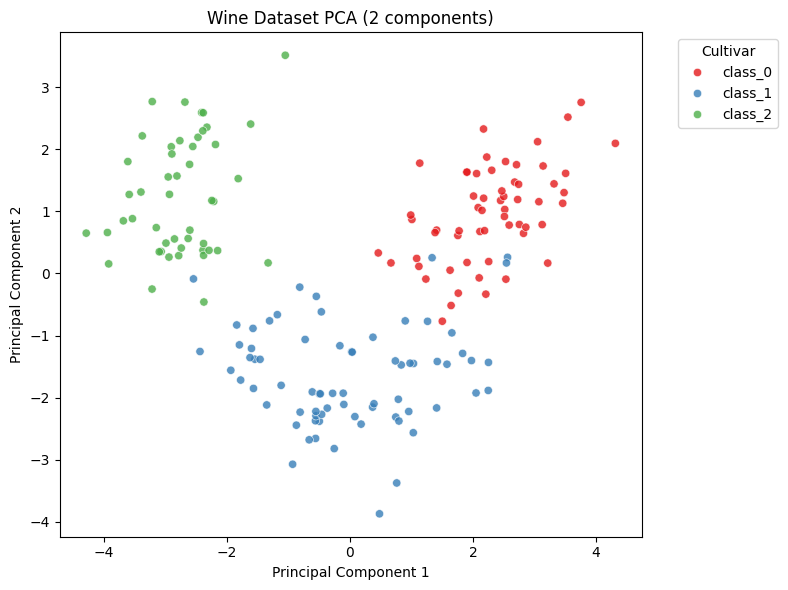

In [ ]:

# Plot PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cultivar', palette='Set1', alpha=0.8)
plt.title('Wine Dataset PCA (2 components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cultivar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

# --- t-SNE ---
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame({
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1],
    'Cultivar': labels
})


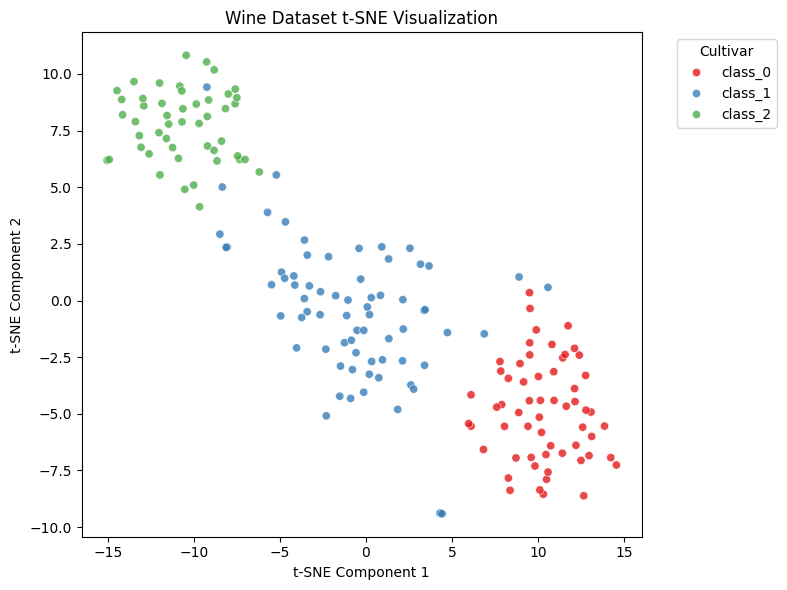

In [ ]:

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Cultivar', palette='Set1', alpha=0.8)
plt.title('Wine Dataset t‑SNE Visualization')
plt.xlabel('t‑SNE Component 1')
plt.ylabel('t‑SNE Component 2')
plt.legend(title='Cultivar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
